In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
df = pd.read_csv("results/csv_systematic.txt")
df = df[df['CSV_err']<0.1][df['rho_coe']!=1.8][df['rho_coe']!=-1.8]
#df = df[df['rho_coe']!=1.8][df['rho_coe']!=-1]#[df['PDF_model']=='JAM20']
#print(df['PDF_model'].unique())
df.describe()

/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/3697949924.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df['CSV_err']<0.1][df['rho_coe']!=1.8][df['rho_coe']!=-1.8]


,Q2,xbj,xbj_corr,rho_coe,CSV,CSV_err
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,4.712500,0.465000,0.464719,-0.633333,0.015595,0.023657
std,0.604514,0.100916,0.093513,1.205709,0.064918,0.019066
min,4.000000,0.275000,0.287822,-1.500000,-0.199142,0.003425
25%,4.000000,0.375000,0.387709,-1.500000,-0.031798,0.010779
50%,4.750000,0.475000,0.470421,-1.500000,0.014927,0.019279
75%,5.500000,0.537500,0.532629,1.000000,0.066308,0.026372
max,5.500000,0.625000,0.614131,1.500000,0.157690,0.079212


In [2]:
import statistics 
xs_one = df[df['Q2']==4].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_one = []
CSV_one_stat = []
CSV_one_sys = []

for ix in xs_one:
    CSVs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_one.append(mean)
    CSV_one_stat.append(err_mean)
    CSV_one_sys.append(std)
print(xs_one)
print(CSV_one)
print(CSV_one_stat)
print(CSV_one_sys)

[0.28782192 0.33444932 0.37382584 0.42002944 0.46941981 0.51694167
 0.56676958]
[-0.01587065400509233, 0.03580057443957649, 0.05915536342507383, 0.058309679331349305, 0.04306639982946169, 0.0070135978843704865, -0.007830103962199027]
[0.04560024260079093, 0.022004638229826907, 0.016690447979338052, 0.01604071310817034, 0.018709786310816948, 0.030704446515275426, 0.05649741489804487]
[0.06425837661406325, 0.07585923316398581, 0.08825893920998762, 0.07290970067709725, 0.05997300120559509, 0.04843003663297368, 0.0179298394472416]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/1888431322.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/1888431322.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4][df['xbj_corr']==ix]['CSV_err']


In [3]:

def delta_udv(parameter):
    #x = np.arange(0.2,0.7,0.01)
    x = np.linspace(0.2,0.7,50)
    return parameter*(1-x)**4*x**-0.5*(x-0.0909)
#x_axis = np.arange(0.2,0.7,0.01)
x_axis = np.linspace(0.2,0.7,50)
y_delta_uv = delta_udv(-0.2)
y_delta_dv = delta_udv(0.2)
y_delta_uv_up = delta_udv(0.8)
y_delta_uv_low = delta_udv(-0.8)
y_delta_dv_up = delta_udv(-0.65)
y_delta_dv_low = delta_udv(0.65)

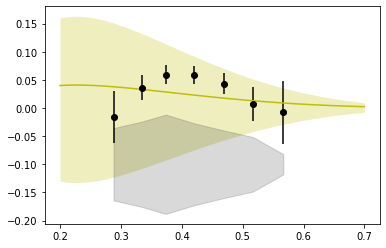

In [4]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

In [5]:
import statistics 
xs_two = df[df['Q2']==4.75].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_two = []
CSV_two_stat = []
CSV_two_sys = []

for ix in xs_two:
    CSVs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_two.append(mean)
    CSV_two_stat.append(err_mean)
    CSV_two_sys.append(std)
print(xs_two)
print(CSV_two)
print(CSV_two_stat)
print(CSV_two_sys)

[0.339491   0.3861515  0.42582662 0.47142311 0.51930108 0.56819041
 0.61413082]
[-0.09996629216101623, 0.03842994689751441, 0.047098140642856015, 0.050273991499957496, 0.045660857388841646, 0.027000851502615594, -0.03299572043682688]
[0.055262116869378944, 0.019990283116018068, 0.01247476722400182, 0.010634260382571988, 0.011464155337326273, 0.017326951015240934, 0.03352703917606186]
[0.06890660796848445, 0.06367591556837612, 0.06335836714520847, 0.06299373861996443, 0.05717747172618631, 0.04627906746235526, 0.028212398584495858]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/2448108693.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/2448108693.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==4.75][df['xbj_corr']==ix]['CSV_err']


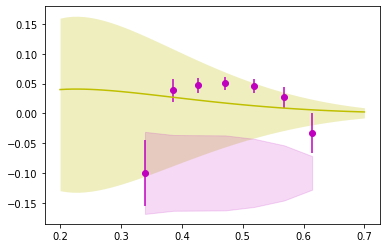

In [6]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

In [7]:
import statistics 
xs_three = df[df['Q2']==5.5].sort_values('xbj_corr')['xbj_corr'].unique()

CSV_three = []
CSV_three_stat = []
CSV_three_sys = []

for ix in xs_three:
    CSVs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV']
    mean = statistics.mean(CSVs)
    std = statistics.stdev(CSVs)
    CSVs_errs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV_err']
    err_mean = statistics.mean(CSVs_errs)
    #print(mean)
    #print(std)
    CSV_three.append(mean)
    CSV_three_stat.append(err_mean)
    CSV_three_sys.append(std)
print(xs_three)
print(CSV_three)
print(CSV_three_stat)
print(CSV_three_sys)

[0.38822829 0.43232054 0.47648507 0.52124882 0.56884832 0.61346745]
[0.02730289274036019, -0.0014597138392790396, 0.010703685990983447, 0.037597069359448745, 0.009976336673625293, -0.027361490883506714]
[0.04362703619893575, 0.015173049365928074, 0.010187767370779567, 0.00957325172297474, 0.010315181753137033, 0.01733643206153998]
[0.05279063685981732, 0.0247137522383055, 0.025494748363327657, 0.046625204780231924, 0.02554105604967316, 0.007495265788480337]


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/3192017738.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV']
/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_96920/3192017738.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CSVs_errs = df[df['Q2']==5.5][df['xbj_corr']==ix]['CSV_err']


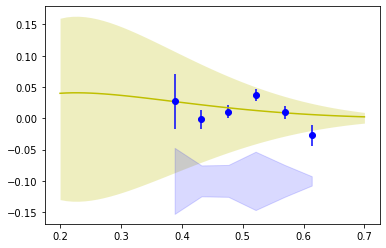

In [8]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

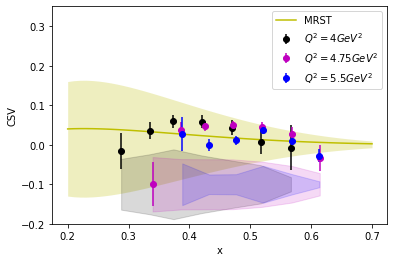

In [9]:
fig, ax = plt.subplots()
ax.fill_between(x_axis,y_delta_uv_up-y_delta_uv_low,y_delta_dv_up-y_delta_dv_low,color = 'y',alpha=.25, linewidth=0)
ax.plot(x_axis,y_delta_dv-y_delta_uv,label = 'MRST',color = 'y')

plt.errorbar(xs_one,CSV_one,CSV_one_stat,fmt = 'o',color = 'k',label = r'$Q^2 = 4GeV^2$')
plt.fill_between(xs_one,-0.1-np.asarray(CSV_one_sys),-0.1+np.asarray(CSV_one_sys),alpha = 0.15,color = 'k')

plt.errorbar(xs_two,CSV_two,CSV_two_stat,fmt = 'o',color = 'm',label = r'$Q^2 = 4.75GeV^2$')
plt.fill_between(xs_two,-0.1-np.asarray(CSV_two_sys),-0.1+np.asarray(CSV_two_sys),alpha = 0.15,color = 'm')

plt.errorbar(xs_three,CSV_three,CSV_three_stat,fmt = 'o',color = 'b',label = r'$Q^2 = 5.5GeV^2$')
plt.fill_between(xs_three,-0.1-np.asarray(CSV_three_sys),-0.1+np.asarray(CSV_three_sys),alpha = 0.15,color = 'b')

plt.xlabel('x')
plt.ylabel('CSV')
plt.ylim(-0.2,0.35)
plt.legend()
#plt.legend(title = 'sys err from all')
plt.savefig('results/CSV_sys_err_from_all.pdf')
#plt.savefig('results/CSV_sys_err_from_PDFs.pdf')
#plt.legend(title = 'sys err from FFs')
#plt.savefig('results/CSV_sys_err_from_FFs.pdf')